In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

df = pd.read_csv('Thursday-01-03-2018_TrafficForML_CICFlowMeter.csv', low_memory=False)

del df['Timestamp'] 

df['keep'] = df.iloc[:, 0:-1].apply(
    lambda row: pd.to_numeric(row, errors='coerce').notnull().all(),
    axis=1
)

df = df.replace([np.inf, -np.inf], np.nan)
df = df[df['keep']]
del df['keep']

df = df.dropna()
df = df.reset_index(drop=True)

df.shape

(328181, 79)

In [22]:
from sklearn.model_selection import train_test_split

X = df.iloc[:, :-1].values #features
y = df.iloc[:, 78].values #label

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

from sklearn.ensemble import RandomForestClassifier

clf=RandomForestClassifier(n_estimators=1000)

clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)


In [23]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7497841653547306


In [24]:
from sklearn.ensemble import RandomForestClassifier

clf=RandomForestClassifier(n_estimators=100)

clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

import pandas as pd
feature_imp = pd.Series(clf.feature_importances_,index=list(df.columns)[:-1]).sort_values(ascending=False)
pd.set_option('display.max_rows', None)
feature_imp

Dst Port            0.100080
Fwd Pkts/s          0.056449
Flow IAT Max        0.056117
Flow Duration       0.053613
Flow IAT Min        0.053206
                      ...   
Bwd Byts/b Avg      0.000000
Bwd Pkts/b Avg      0.000000
Bwd Blk Rate Avg    0.000000
Bwd PSH Flags       0.000000
Bwd URG Flags       0.000000
Length: 78, dtype: float64

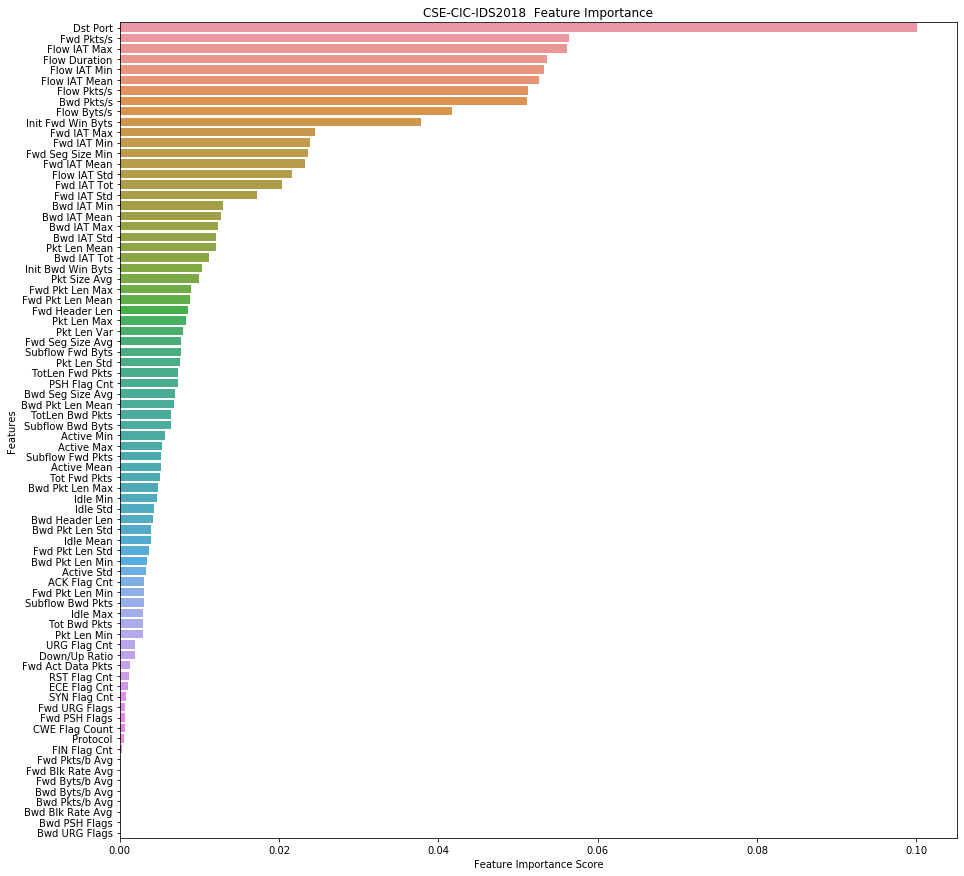

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.barplot(x=feature_imp, y=feature_imp.index)

fig = plt.gcf()
fig.set_size_inches(15, 15)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("CSE-CIC-IDS2018  Feature Importance")
plt.show()

In [27]:
pd.set_option('display.max_rows', None)
feature_imp

Dst Port             0.100080
Fwd Pkts/s           0.056449
Flow IAT Max         0.056117
Flow Duration        0.053613
Flow IAT Min         0.053206
Flow IAT Mean        0.052637
Flow Pkts/s          0.051192
Bwd Pkts/s           0.051181
Flow Byts/s          0.041710
Init Fwd Win Byts    0.037802
Fwd IAT Max          0.024511
Fwd IAT Min          0.023884
Fwd Seg Size Min     0.023633
Fwd IAT Mean         0.023305
Flow IAT Std         0.021666
Fwd IAT Tot          0.020397
Fwd IAT Std          0.017259
Bwd IAT Min          0.013001
Bwd IAT Mean         0.012715
Bwd IAT Max          0.012361
Bwd IAT Std          0.012061
Pkt Len Mean         0.012033
Bwd IAT Tot          0.011217
Init Bwd Win Byts    0.010274
Pkt Size Avg         0.009991
Fwd Pkt Len Max      0.008927
Fwd Pkt Len Mean     0.008841
Fwd Header Len       0.008508
Pkt Len Max          0.008263
Pkt Len Var          0.007909
Fwd Seg Size Avg     0.007696
Subflow Fwd Byts     0.007648
Pkt Len Std          0.007605
TotLen Fwd